# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# We can use this module to open/read/write netCDF files
from scipy.io import netcdf

# Open and read a netCDF file

#### 'lat', 'lon' and 'T_MIN_L103_Pd' variables are what we need

In [2]:
file = netcdf.netcdf_file("./data/20191231_all.nc")

file.variables

OrderedDict([('time', <scipy.io.netcdf.netcdf_variable at 0x1eb4f34ddc8>),
             ('valid_date_time',
              <scipy.io.netcdf.netcdf_variable at 0x1eb4f351048>),
             ('ref_date_time',
              <scipy.io.netcdf.netcdf_variable at 0x1eb4f3512c8>),
             ('forecast_hour',
              <scipy.io.netcdf.netcdf_variable at 0x1eb4f351448>),
             ('lat', <scipy.io.netcdf.netcdf_variable at 0x1eb4f351408>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x1eb4f351608>),
             ('TMP_L1', <scipy.io.netcdf.netcdf_variable at 0x1eb4f351a48>)])

#### Take a look at longitude, latitude and temperature data

In [3]:
lon = file.variables['lon'].data
print(lon.shape)
print(lon)

(720,)
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   

In [4]:
lat = file.variables['lat'].data
print(lat.shape)
print(lat)

(361,)
[ 90.   89.5  89.   88.5  88.   87.5  87.   86.5  86.   85.5  85.   84.5
  84.   83.5  83.   82.5  82.   81.5  81.   80.5  80.   79.5  79.   78.5
  78.   77.5  77.   76.5  76.   75.5  75.   74.5  74.   73.5  73.   72.5
  72.   71.5  71.   70.5  70.   69.5  69.   68.5  68.   67.5  67.   66.5
  66.   65.5  65.   64.5  64.   63.5  63.   62.5  62.   61.5  61.   60.5
  60.   59.5  59.   58.5  58.   57.5  57.   56.5  56.   55.5  55.   54.5
  54.   53.5  53.   52.5  52.   51.5  51.   50.5  50.   49.5  49.   48.5
  48.   47.5  47.   46.5  46.   45.5  45.   44.5  44.   43.5  43.   42.5
  42.   41.5  41.   40.5  40.   39.5  39.   38.5  38.   37.5  37.   36.5
  36.   35.5  35.   34.5  34.   33.5  33.   32.5  32.   31.5  31.   30.5
  30.   29.5  29.   28.5  28.   27.5  27.   26.5  26.   25.5  25.   24.5
  24.   23.5  23.   22.5  22.   21.5  21.   20.5  20.   19.5  19.   18.5
  18.   17.5  17.   16.5  16.   15.5  15.   14.5  14.   13.5  13.   12.5
  12.   11.5  11.   10.5  10.    9.5   9.   

##### Note, the first dimension of temperature data is time. 4 represents 12AM, 6AM, 12PM and 6PM in a day.

In [5]:
temperature = file.variables['TMP_L1'].data.copy()




for i in range(360):
    for j in range(720):
        if temperature[0, i, j] > 1000:
            temperature[0, i, j] = None

print(temperature.shape)
print(temperature[0])

(1, 361, 720)
[[245.37602 245.37602 245.37602 ... 245.37602 245.37602 245.37602]
 [246.21402 246.19801 246.18202 ... 246.23001 246.22601 246.22002]
 [246.09001 246.09601 246.10202 ... 245.97202 246.01001 246.05002]
 ...
 [243.71802 243.71402 243.71002 ... 243.72202 243.72002 243.71802]
 [242.83002 242.82802 242.82802 ... 242.82202 242.82402 242.82602]
 [242.50401 242.50401 242.50401 ... 242.50401 242.50401 242.50401]]


#### All data above are of `numpy.ndarray` type. We can process the same day in all 10 years, day by day to get what we want.

# Visualization

I'm not too worried about visualization now since all data are numpy arrays, but just in case you want to see 

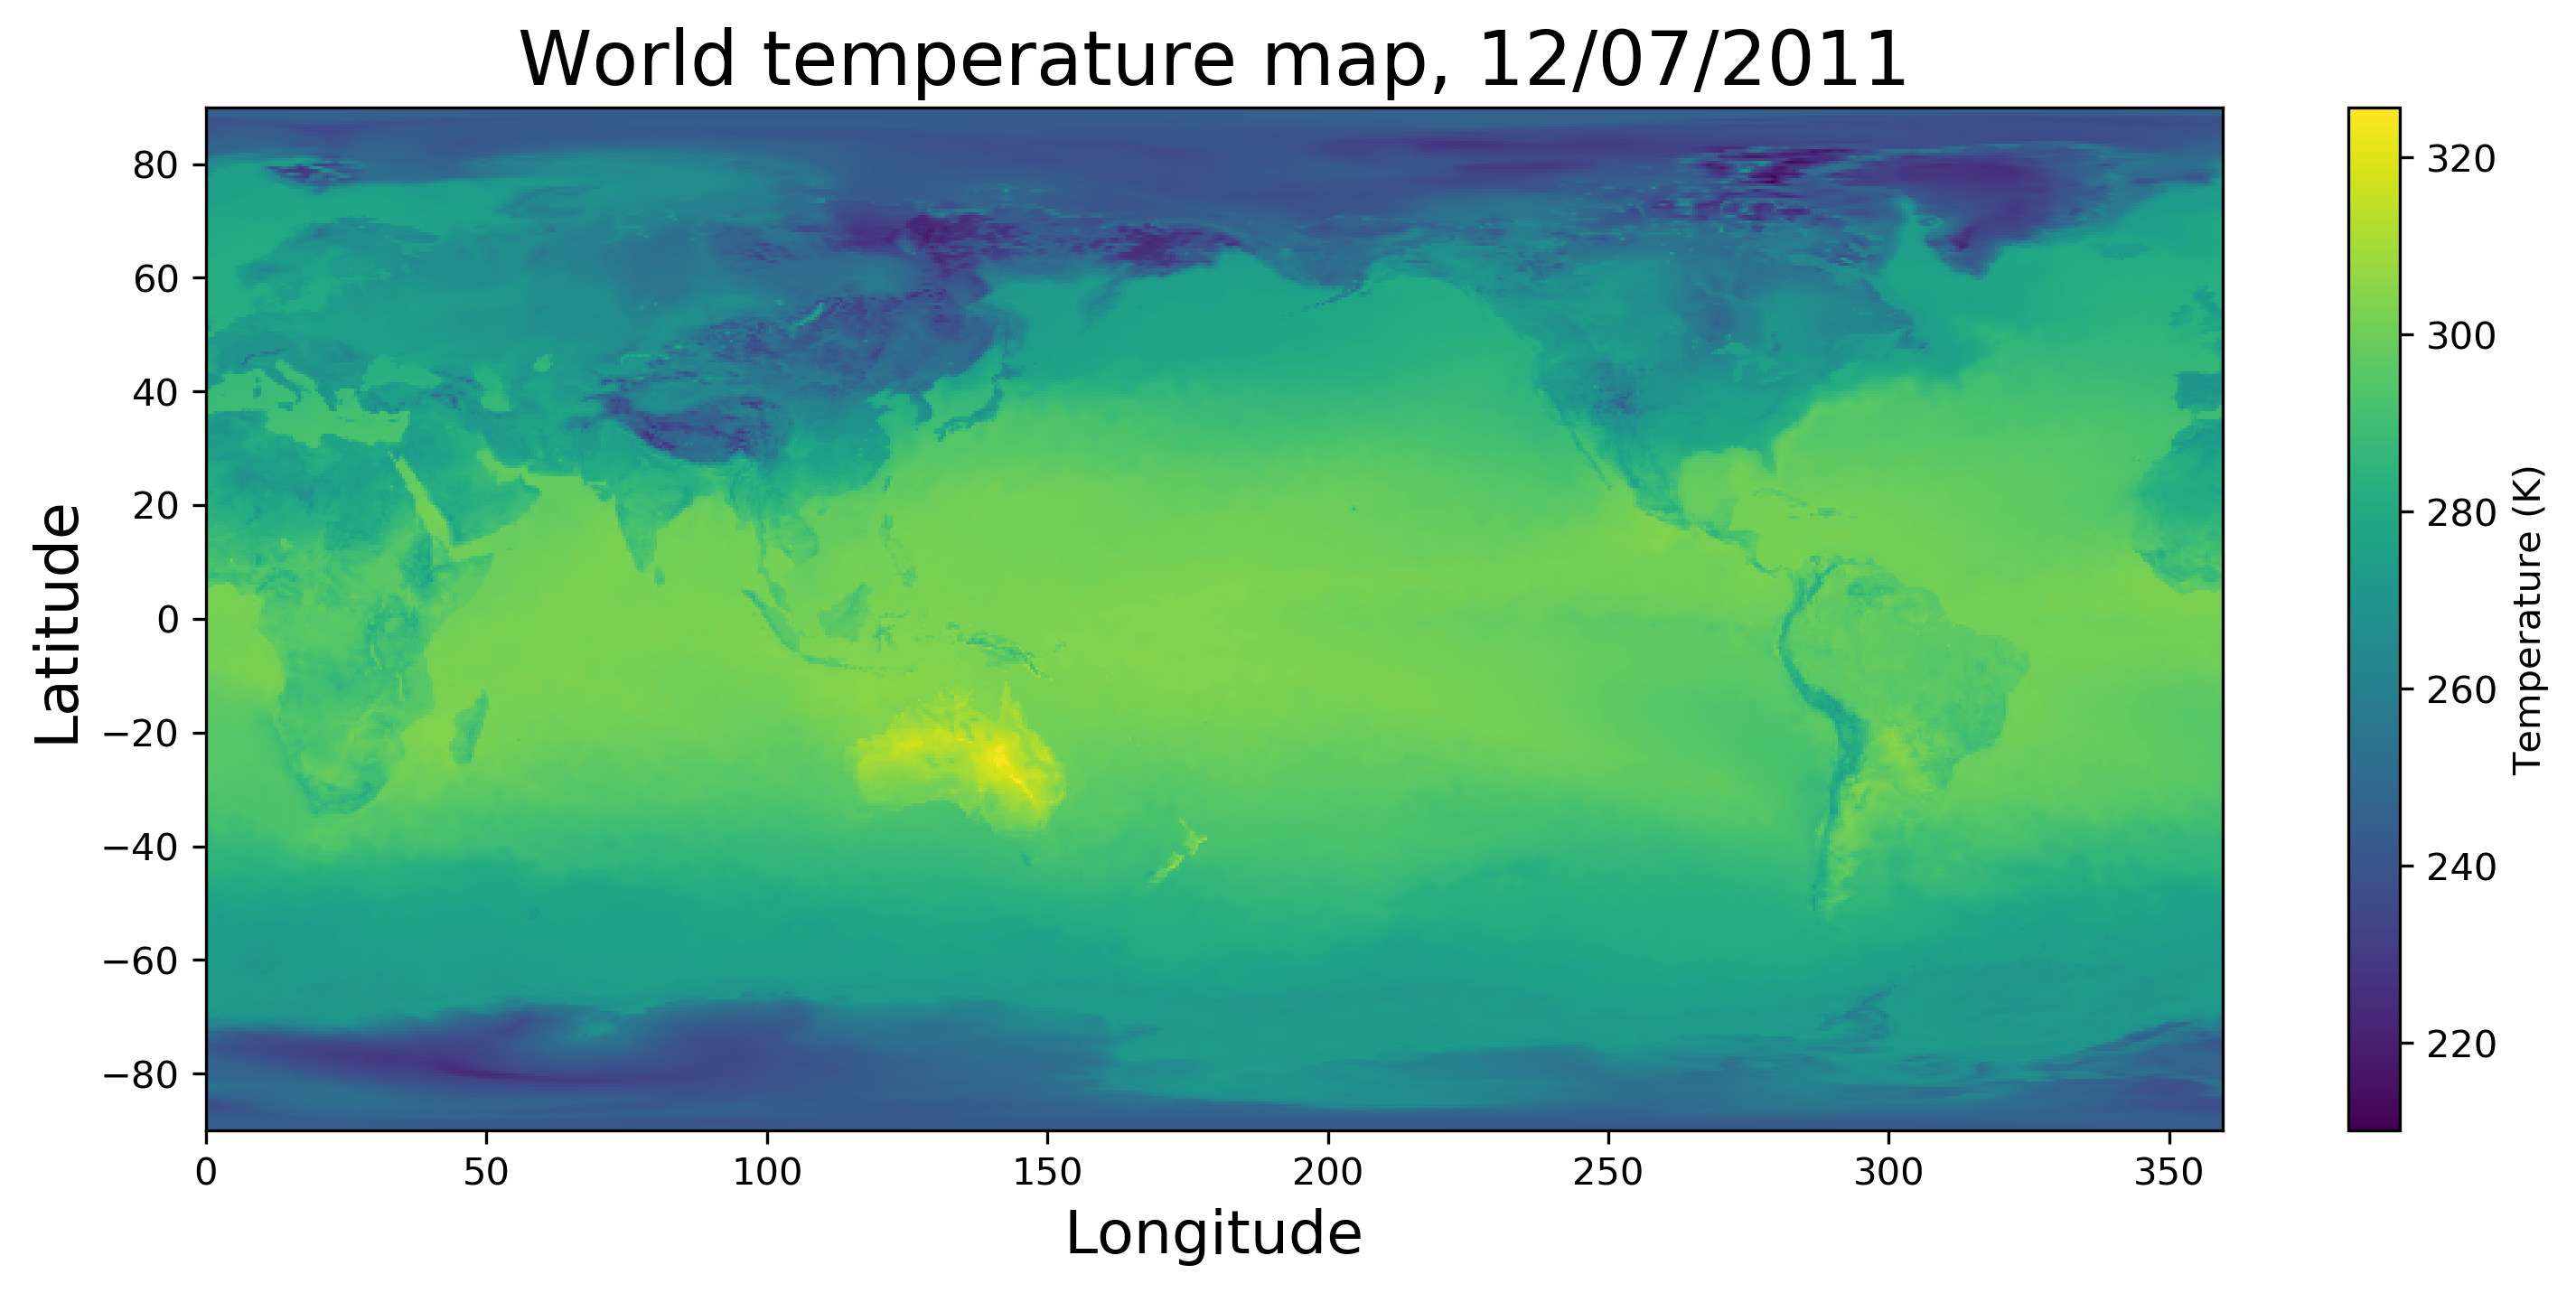

In [6]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
heatmap = ax.pcolormesh(lon, lat, temperature[0])
ax.set_title('World temperature map, 12/07/2011', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)
fig.colorbar(heatmap, label='Temperature (K)')

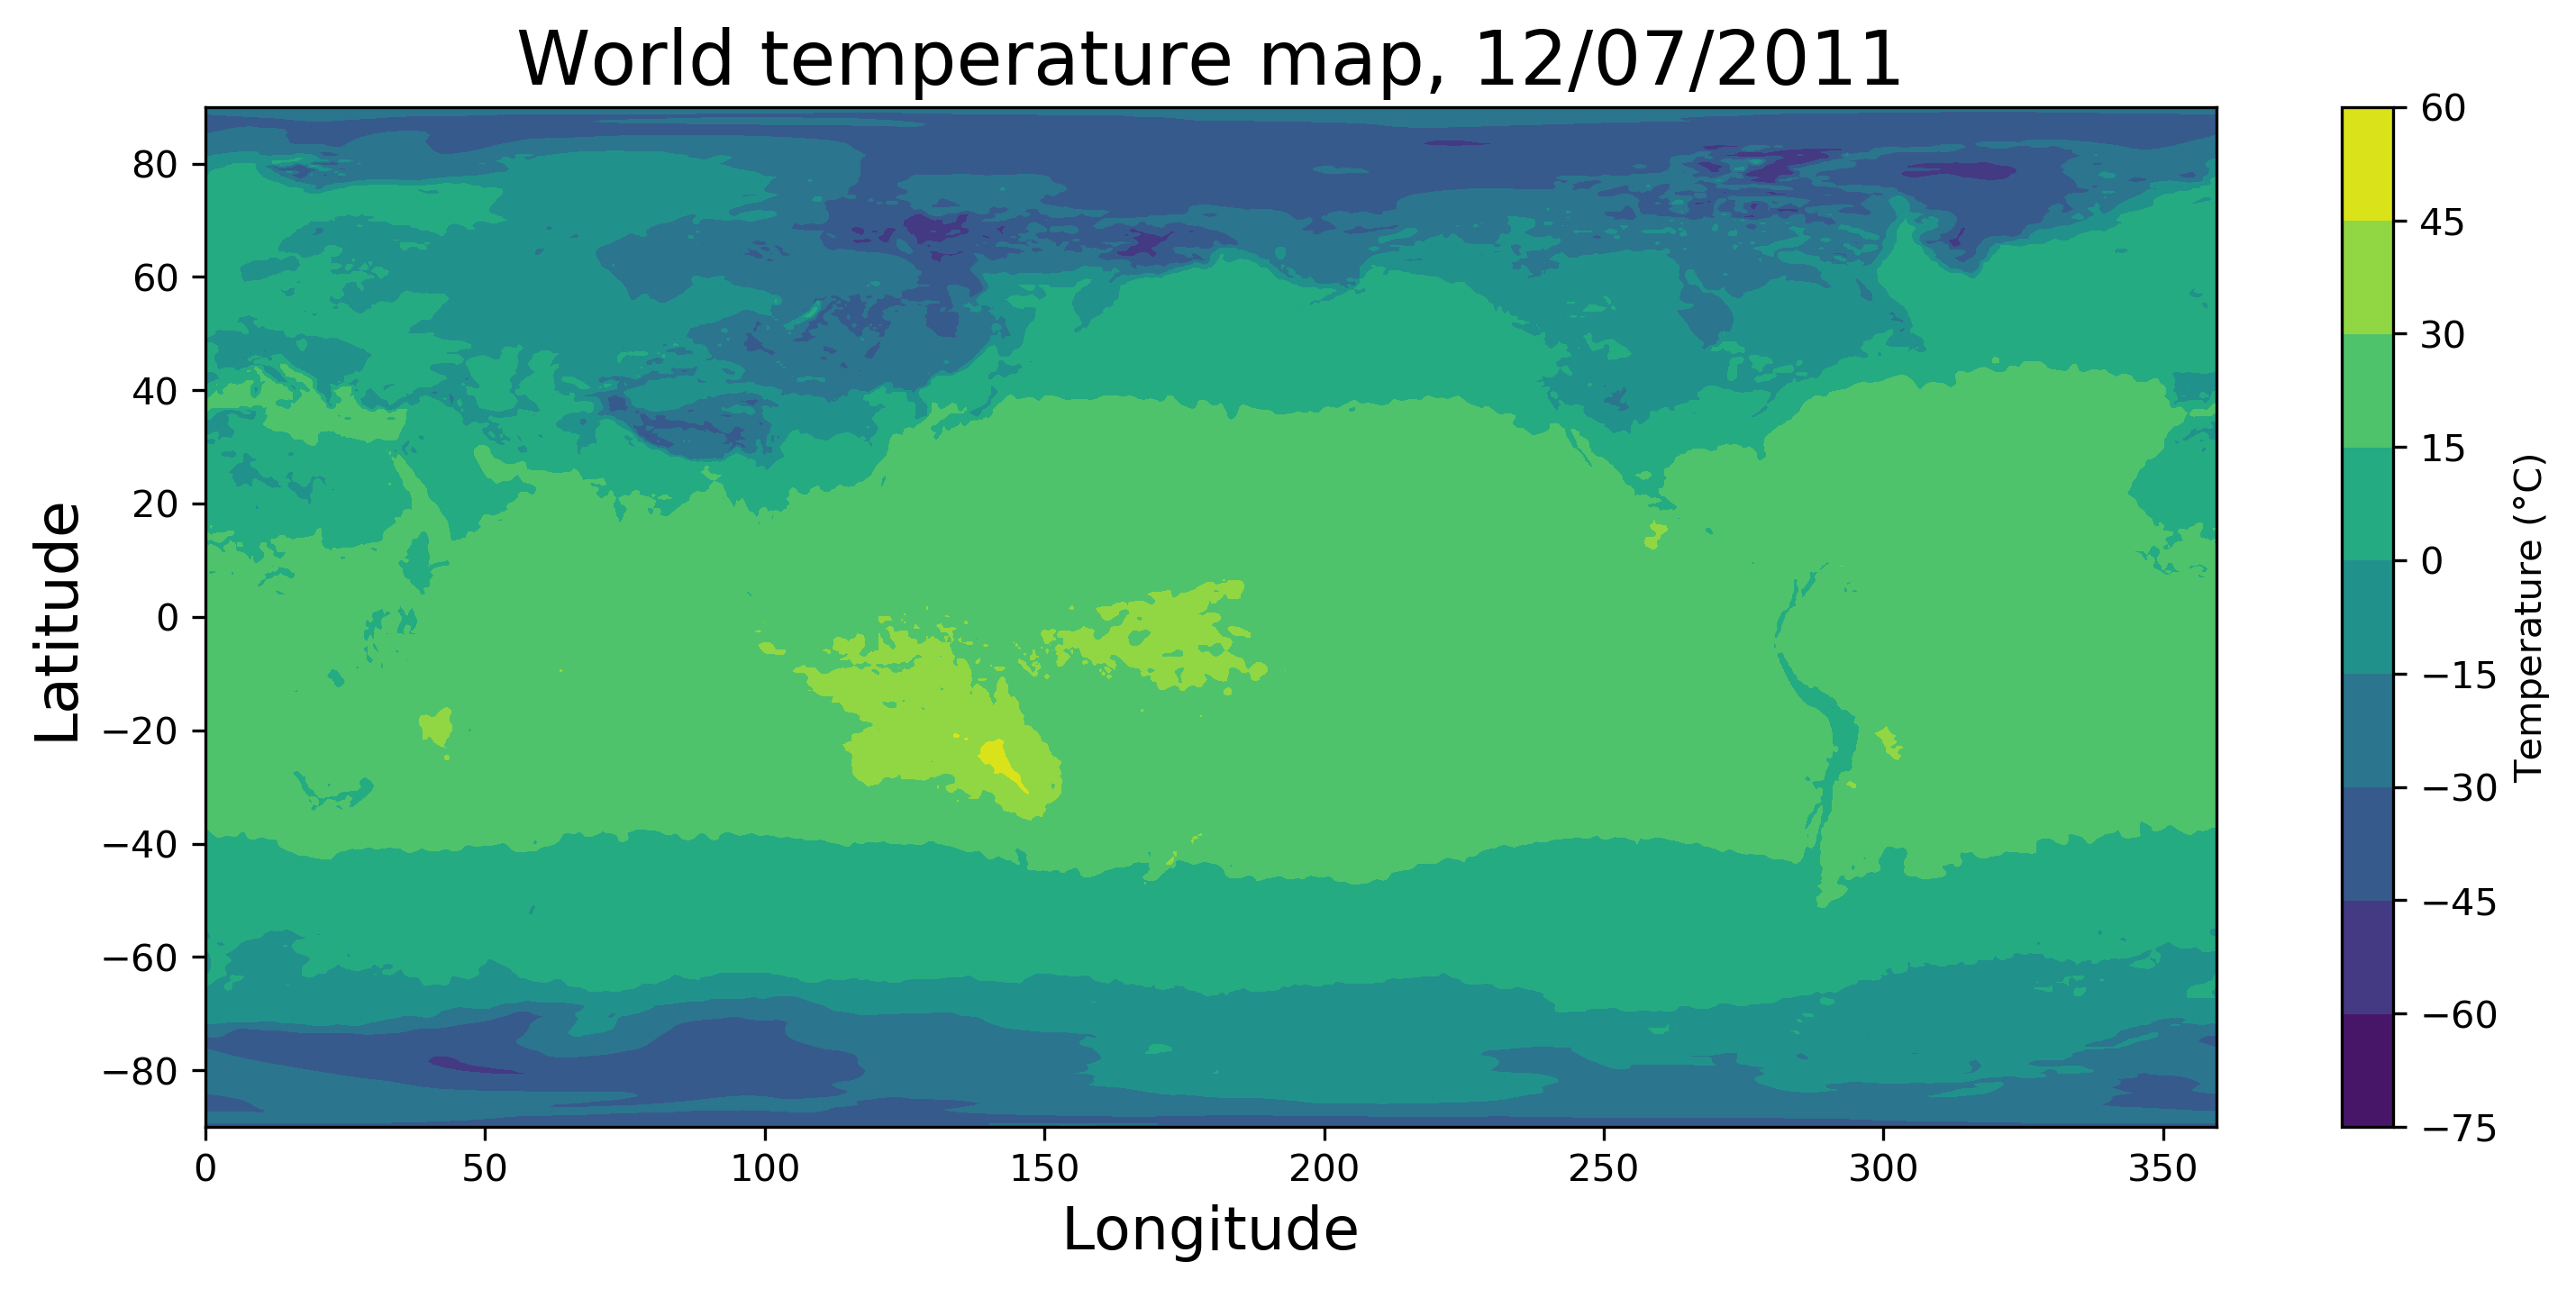

In [17]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
contour = ax.contourf(lon, lat, temperature[0]-273.15, levels=10)
ax.set_title('World temperature map, 12/07/2011', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)
fig.colorbar(contour, label='Temperature (°C)')

I didn't download data for Antarctica. Sorry penguins, it is not a good idea to drive your Tesla there!